In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

import re
import glob
from sklearn.cluster import KMeans
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
myAA = ["R","H","K","D","E","S","T","N","Q","C","G","P","A","V","I","L","M","F","Y","W"]
def print_pssm(array,title="",scale = None,label = [],print_val = 0,print_cut = 0.001):
    #Transform to Matrix
    vect = np.array(array)
    matr = vect.reshape(int(len(vect)/20),20).transpose()
    if not scale:
        scale = matr.max()
    figsize(len(vect)/20*1.25,6)
    plt.pcolor(matr,cmap='RdBu', vmin=-scale, vmax=scale)

    plt.title(title)
    plt.yticks(np.arange(20)+0.5,myAA)
    #print(len(label))
    if len(label) != 0:
        plt.xticks(np.arange(len(vect)/20)+0.5,label)
        
    if print_val == 1:    
        for y in range(matr.shape[0]):
            for x in range(matr.shape[1]):
                if abs(matr[y,x]) > print_cut:
                    plt.text(x + 0.5, y + 0.5, "%.3f" % matr[y,x],
                             horizontalalignment='center',
                             verticalalignment='center',
                             )  
    plt.colorbar()
    plt.show()
def encodeAA(mySeq):
    myXEncod = []
    for i in range(0,len(mySeq)):
        if mySeq[i] == "-":
            vector = np.zeros(20);
            myXEncod.append(vector)
            continue
        myId = AAtoInt(mySeq[i])
    #    print(i,myId)
        vector = np.zeros(20);
        vector[myId]=1
        myXEncod.append(vector)
    myXEncod = np.array(myXEncod).ravel()
    return(myXEncod)

#Function qui transform AA en Int pour le SKlearn
def AAtoInt(AA):
    myAA = ["R","H","K","D","E","S","T","N","Q","C","G","P","A","V","I","L","M","F","Y","W"]
    for i in range(0,len(myAA)):
        if AA == myAA[i]:
            return(i)
def InttoAA(myId):
    myAA = ["R","H","K","D","E","S","T","N","Q","C","G","P","A","V","I","L","M","F","Y","W"]
    
    #print(myAA[myId])
    return(myAA[myId])

In [3]:
#Load all dataframe
dfs = []
remap = []
for csv in glob.glob("./data/*.csv"):
    if "mix" in csv:
        continue
    if "pilot" in csv:
        continue
    df = pd.read_csv(csv)
    df = df.groupby(by="protein").mean()
    df["protein"] = df.index.values
    dfs.append(df[list(df.filter(regex="energy").columns)+["protein"]])
    remap += [t for t in list(df.columns) if re.search("_energy",t)]
remap = np.unique(remap)
print(remap)
   
#Merge all 
adf = dfs[0]
for i in range(1,len(dfs)):
    adf = pd.merge(adf,dfs[i],on="protein",how="outer")

['f100_energy' 'f100r_energy' 'm1_energy' 'm1r_energy' 'x100_energy'
 'x100r_energy' 'x1_energy' 'x1r_energy']


In [4]:

s = adf["protein"].values
print(s[0])
adf["twenty"] = [x[2:] for x in s]
#Encode AA
adf["EncodeAA"] = list(map(encodeAA, adf["twenty"].values))

#Concat ener
AllRecep = []
for r in ["x","f","m"]:
    subdf = adf.filter(regex=r+"\d+r*_energy")
    print(subdf.columns)
    adf["mix_"+r+"_ener"] = subdf.mean(axis=1)
    AllRecep.append("mix_"+r+"_ener")

GQAAADVGAQLRRMADDYNAQY
Index(['x1_energy', 'x100_energy', 'x100r_energy', 'x1r_energy'], dtype='object')
Index(['f100_energy', 'f100r_energy'], dtype='object')
Index(['m1_energy', 'm1r_energy'], dtype='object')


In [5]:
adf = adf[["twenty","EncodeAA"]+AllRecep]

In [6]:
adf[["twenty"]+AllRecep].to_csv("./cluster/clust_0.csv")

In [7]:
kmeans = KMeans(n_clusters=12,random_state=13).fit(list(adf["EncodeAA"].values))

0 415
mix_x_ener    -9.925165
mix_f_ener   -10.082681
mix_m_ener   -10.154705
dtype: float64 mix_x_ener    0.650138
mix_f_ener    0.414517
mix_m_ener    0.489336
dtype: float64
mix_x_ener    345
mix_f_ener    264
mix_m_ener    334
dtype: int64


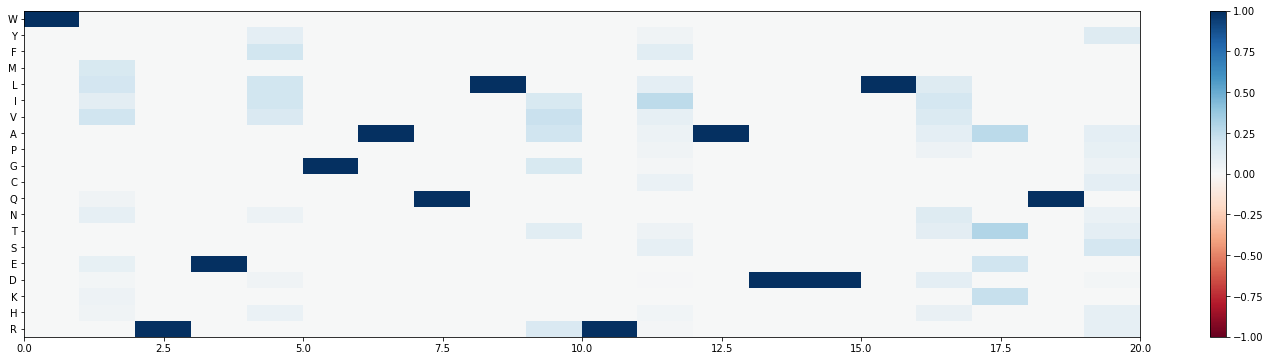

1 966
mix_x_ener    -9.750114
mix_f_ener   -10.485179
mix_m_ener   -10.651686
dtype: float64 mix_x_ener    0.439449
mix_f_ener    0.408631
mix_m_ener    0.693404
dtype: float64
mix_x_ener    787
mix_f_ener    751
mix_m_ener    703
dtype: int64


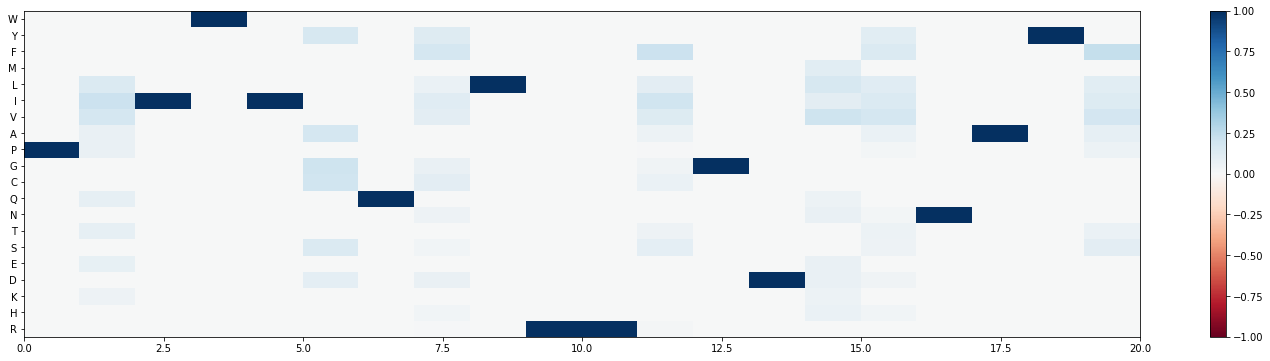

2 938
mix_x_ener   -10.123457
mix_f_ener   -10.504549
mix_m_ener   -10.582355
dtype: float64 mix_x_ener    0.794688
mix_f_ener    0.535471
mix_m_ener    0.975202
dtype: float64
mix_x_ener    804
mix_f_ener    614
mix_m_ener    730
dtype: int64


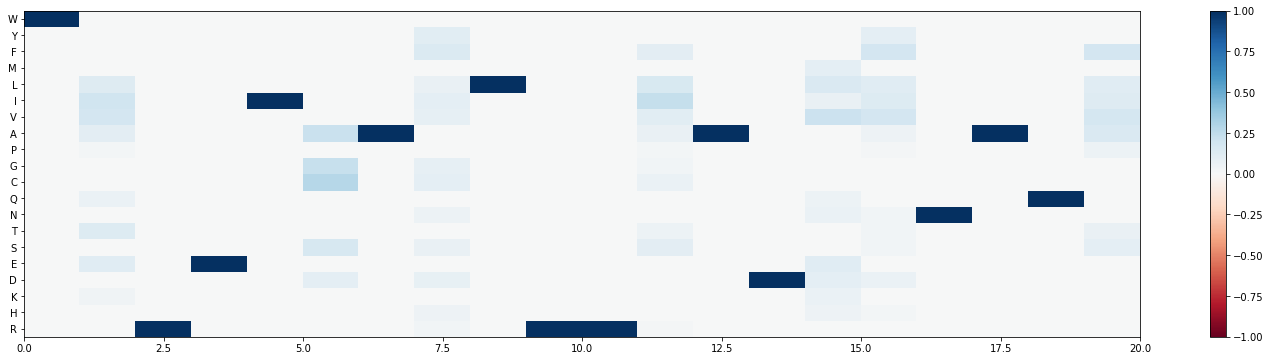

3 356
mix_x_ener    -9.447586
mix_f_ener   -10.138088
mix_m_ener   -11.101956
dtype: float64 mix_x_ener    0.269871
mix_f_ener    0.531737
mix_m_ener    1.081344
dtype: float64
mix_x_ener    309
mix_f_ener    162
mix_m_ener    271
dtype: int64


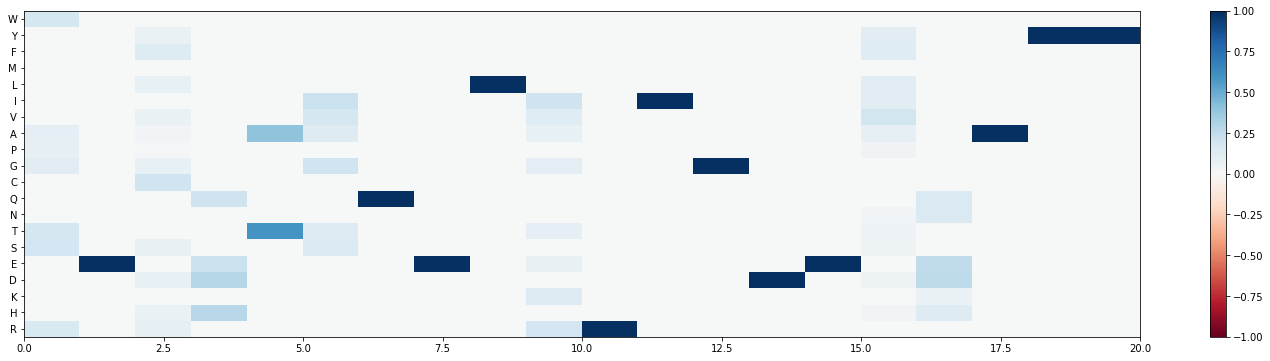

4 456
mix_x_ener    -9.659390
mix_f_ener   -10.007266
mix_m_ener   -10.016754
dtype: float64 mix_x_ener    0.578455
mix_f_ener    0.360926
mix_m_ener    0.462786
dtype: float64
mix_x_ener    377
mix_f_ener    280
mix_m_ener    382
dtype: int64


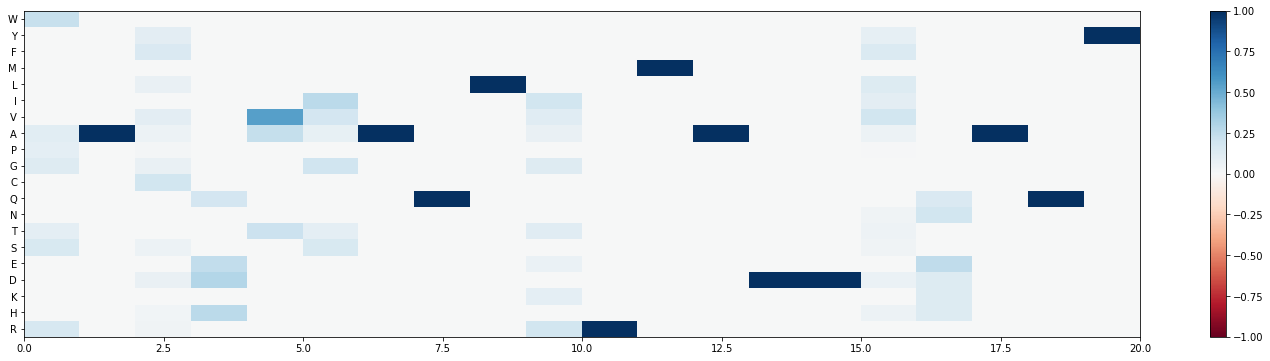

5 403
mix_x_ener   -10.204900
mix_f_ener   -10.287920
mix_m_ener   -10.663224
dtype: float64 mix_x_ener    0.563203
mix_f_ener    0.471131
mix_m_ener    0.654312
dtype: float64
mix_x_ener    348
mix_f_ener    263
mix_m_ener    244
dtype: int64


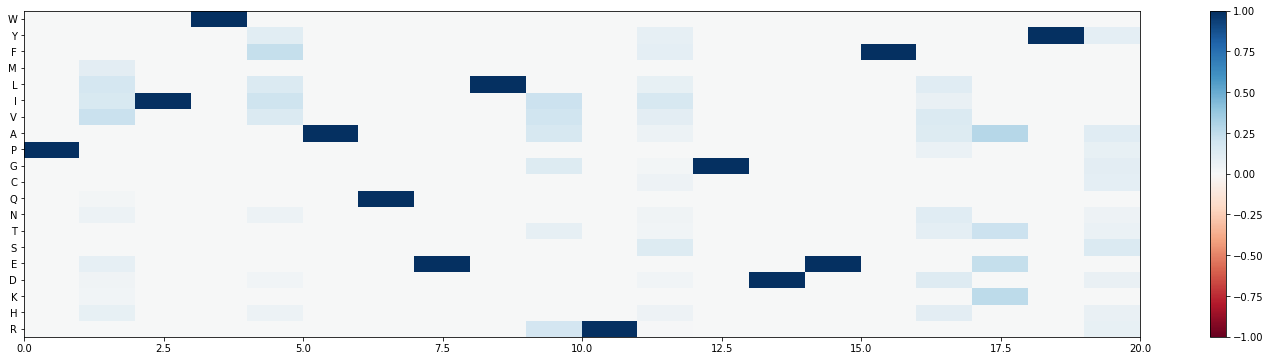

6 551
mix_x_ener    -9.617242
mix_f_ener   -10.545925
mix_m_ener   -11.973713
dtype: float64 mix_x_ener    0.427392
mix_f_ener    0.663946
mix_m_ener    1.168697
dtype: float64
mix_x_ener    433
mix_f_ener    305
mix_m_ener    455
dtype: int64


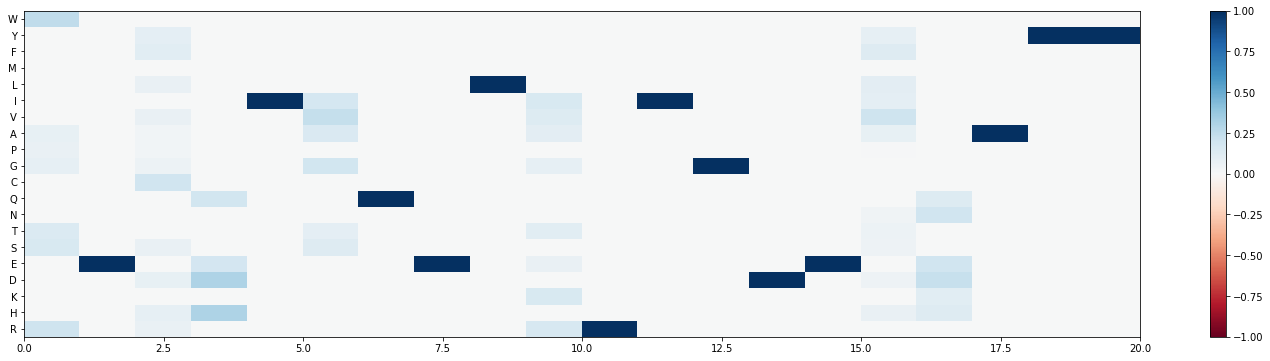

7 522
mix_x_ener    -9.890681
mix_f_ener   -10.314213
mix_m_ener   -10.705960
dtype: float64 mix_x_ener    0.636207
mix_f_ener    0.575136
mix_m_ener    1.039355
dtype: float64
mix_x_ener    455
mix_f_ener    335
mix_m_ener    420
dtype: int64


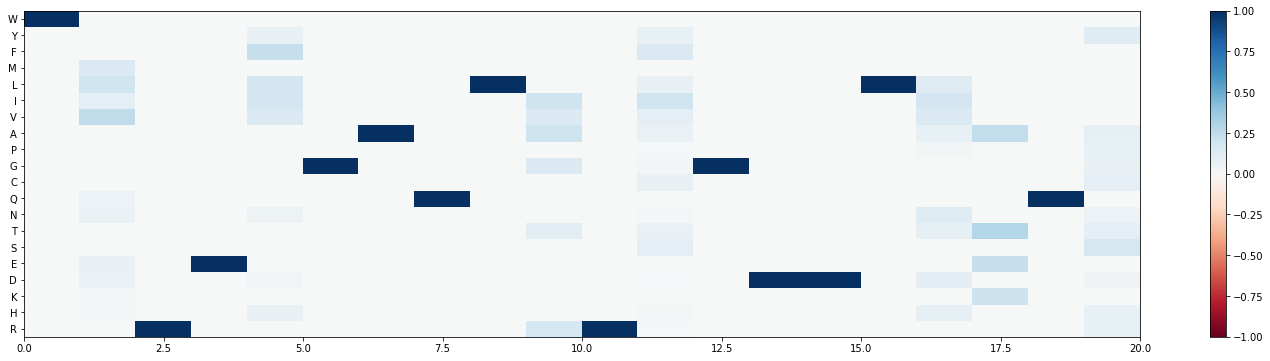

8 239
mix_x_ener    -9.704088
mix_f_ener   -10.222905
mix_m_ener   -10.282581
dtype: float64 mix_x_ener    0.439081
mix_f_ener    0.373104
mix_m_ener    0.467645
dtype: float64
mix_x_ener    197
mix_f_ener    178
mix_m_ener    182
dtype: int64


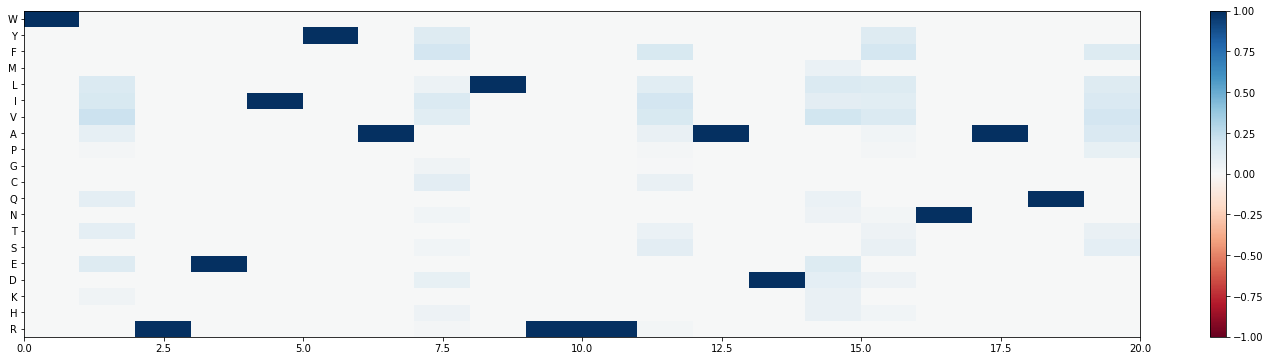

9 370
mix_x_ener   -10.333325
mix_f_ener   -10.154035
mix_m_ener   -10.448834
dtype: float64 mix_x_ener    0.635709
mix_f_ener    0.378383
mix_m_ener    0.475894
dtype: float64
mix_x_ener    330
mix_f_ener    263
mix_m_ener    236
dtype: int64


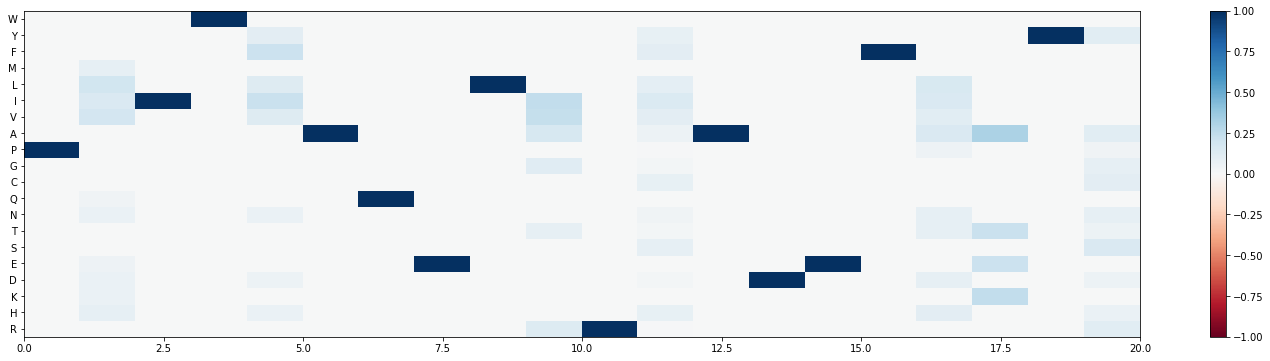

10 367
mix_x_ener    -9.614465
mix_f_ener   -10.363977
mix_m_ener   -11.654568
dtype: float64 mix_x_ener    0.404194
mix_f_ener    0.597763
mix_m_ener    1.157331
dtype: float64
mix_x_ener    320
mix_f_ener    200
mix_m_ener    278
dtype: int64


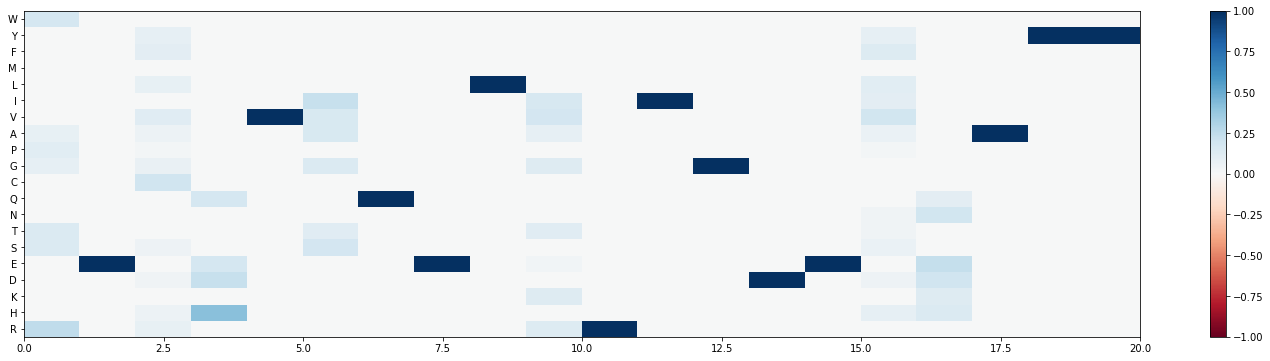

11 319
mix_x_ener    -9.786139
mix_f_ener   -10.277097
mix_m_ener   -10.182403
dtype: float64 mix_x_ener    0.594485
mix_f_ener    0.536877
mix_m_ener    0.645326
dtype: float64
mix_x_ener    278
mix_f_ener    190
mix_m_ener    256
dtype: int64


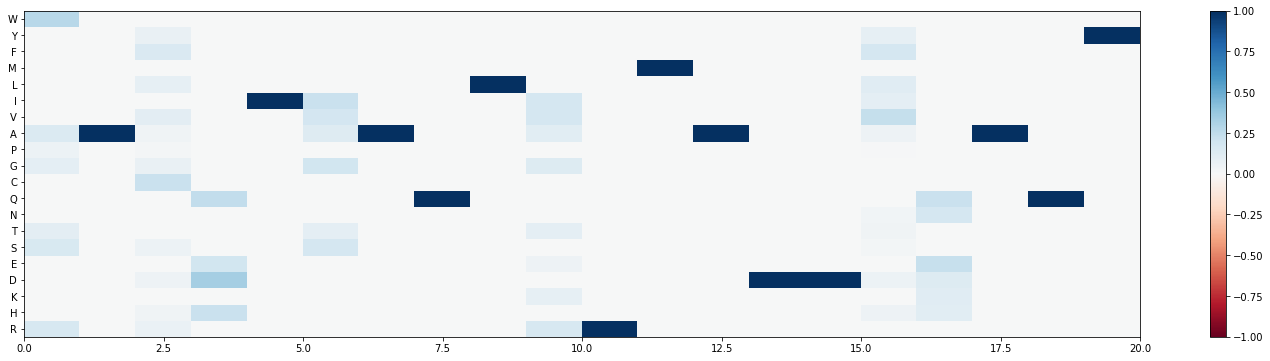

In [8]:
AllFeat = []
for k in sorted(np.unique(kmeans.labels_)):
    ind = kmeans.labels_ == k
    clust_seq = adf["EncodeAA"].values[ind]
    clust_df = adf[ind]
    print(k,len(clust_df))
    print(clust_df.filter(regex="mix_").mean(),clust_df.filter(regex="mix_").std())
    print(len(clust_df)-clust_df[AllRecep].isnull().sum())
    print_pssm(list(clust_df["EncodeAA"].values.mean()))
    AllFeat.append(np.max(list(clust_df["EncodeAA"].values),axis=0))
    clust_df[["twenty"]+AllRecep].to_csv("./cluster/clust_"+str(k+1)+".csv")


In [9]:
AllOver = dict()
for i in range(len(AllFeat)):
    f1 = AllFeat[i]
    if i not in AllOver:
        AllOver[i] = dict()
    for j in range(i,len(AllFeat)):
        if j not in AllOver:
            AllOver[j] = dict()
        f2 = AllFeat[j]
        AllOver[i][j] = np.dot(f1,f2)
        AllOver[j][i] = AllOver[i][j]
        if i == j:
            print(i,j,len(f1),len(f2),np.dot(f1,f2))
        

0 0 400 400 76.0
1 1 400 400 81.0
2 2 400 400 80.0
3 3 400 400 69.0
4 4 400 400 70.0
5 5 400 400 76.0
6 6 400 400 68.0
7 7 400 400 76.0
8 8 400 400 76.0
9 9 400 400 76.0
10 10 400 400 68.0
11 11 400 400 68.0


In [10]:
import seaborn as sns

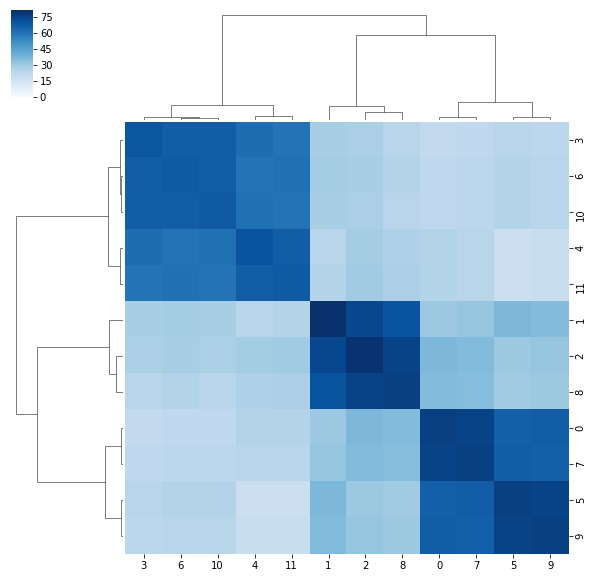

In [11]:
sns.clustermap(pd.DataFrame(AllOver),vmin=0,cmap="Blues")

In [12]:
#Add some random sequece
AA = ["R","H","K","D","E","S","T","N","Q","C","G","P","A","V","I","L","M","F","Y","W"]
x_rand = []
y_rand = []
for i in range(0,4000):
    seq = ""
    for k in range(0,20):
        seq += AA[np.random.randint(20)]
    x_rand.append(seq)
    y_rand.append(np.random.random()-1.0)
#x_rand = np.array(x_rand)
#y_rand = np.array(y_rand)

In [13]:
pd.DataFrame([x_rand,y_rand],index=["EncodeAA","Ener"]).transpose().to_csv("./cluster/random.csv")